# Squential workflow with prompt chaining


In [31]:
from langchain_openai import ChatOpenAI
from typing import TypedDict
from langgraph.graph import StateGraph,START,END
from dotenv import load_dotenv
from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser

load_dotenv()


True

In [32]:
llm=ChatOpenAI()

In [33]:
class BLOGState(TypedDict):
    title: str
    outline: str
    blog: str
    evaluation: str

In [34]:
# code for gen_outline

def gen_outline(state: BLOGState)->BLOGState:

    title=state['title']
    
    prompt=PromptTemplate.from_template(
        '''create small outline of the blog for title {title} '''
    )

    chain= prompt | llm | StrOutputParser()
    outline=chain.invoke({'title':title})

    state['outline']=outline
    return state


In [35]:
# code for gen_blog

def gen_blog(state: BLOGState)->BLOGState:
    title=state['title']
    outline=state['outline']
    prompt=PromptTemplate.from_template("write a small blog on {title} based on outline {outline}")
    chain = prompt | llm | StrOutputParser()
    blog=chain.invoke({'title':title,'outline':outline})
    state['blog']=blog
    return state

In [36]:
# code for evaluate_blog
def evaluate_blog(state: BLOGState)->BLOGState:
    title=state['title']
    outline=state['outline']
    blog=state['blog']
    prompt=PromptTemplate.from_template(
        "On this title {title} and based on outline rate my blog out of 10 and give opinion in 1 line<{blog}>"
    )
    chain= prompt | llm |StrOutputParser()
    evaluation=chain.invoke({'title':title,'outline':outline,'blog':blog})
    state['evaluation']=evaluation
    return state

In [37]:
graph=StateGraph(BLOGState)

graph.add_node('gen_outline',gen_outline)
graph.add_node('gen_blog',gen_blog)
graph.add_node('evaluate_blog',evaluate_blog
)

graph.add_edge(START,'gen_outline')
graph.add_edge('gen_outline','gen_blog')
graph.add_edge('gen_blog','evaluate_blog')
graph.add_edge('evaluate_blog',END)

workflow=graph.compile()



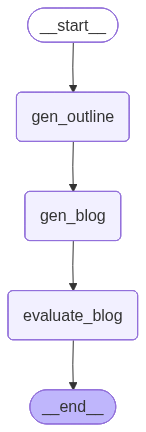

In [38]:
workflow

In [39]:
# execute

result=workflow.invoke({'title':'langgraph'})

In [40]:
result

{'title': 'langgraph',
 'outline': 'I. Introduction \n    A. Explanation of the importance of using title language in a blog \nII. What is title language?\n    A. Definition and purpose of title language\nIII. Tips for effective title language \n    A. Use of keywords\n    B. Keep it concise and to the point\n    C. Make it engaging and enticing\nIV. Examples of successful title language \n    A. Analysis of popular blogs and their titles\nV. Conclusion \n    A. Recap of the importance of using title language in a blog',
 'blog': "In the world of blogging, the title language you choose for your posts plays a crucial role in capturing the attention of your audience and enticing them to read further. Title language is the first impression your readers will have of your blog, so it's important to make it engaging and compelling. In this blog, we'll explore the importance of using title language effectively, what title language is, and provide some tips and examples for creating successful

In [41]:
print(result['outline'])

I. Introduction 
    A. Explanation of the importance of using title language in a blog 
II. What is title language?
    A. Definition and purpose of title language
III. Tips for effective title language 
    A. Use of keywords
    B. Keep it concise and to the point
    C. Make it engaging and enticing
IV. Examples of successful title language 
    A. Analysis of popular blogs and their titles
V. Conclusion 
    A. Recap of the importance of using title language in a blog


In [42]:
print(result['blog'])

In the world of blogging, the title language you choose for your posts plays a crucial role in capturing the attention of your audience and enticing them to read further. Title language is the first impression your readers will have of your blog, so it's important to make it engaging and compelling. In this blog, we'll explore the importance of using title language effectively, what title language is, and provide some tips and examples for creating successful titles.

Title language is the language used in the titles of your blog posts. It serves several purposes, including grabbing the attention of your readers, conveying the main topic or message of your post, and improving your blog's search engine optimization (SEO). A well-crafted title can make a significant difference in the success of your blog post.

When creating title language, it's important to consider a few key tips for effectiveness. Firstly, using relevant keywords in your title can help improve your post's visibility i

In [43]:
print(result['evaluation'])

I would rate this blog a 9/10. The information provided is valuable and the tips are practical for bloggers looking to improve their title language.
